In [1]:
import sys
print(sys.version)

3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 21:14:29) 
[GCC 7.3.0]


In [2]:
import os
import numpy as np
from tsnecuda import TSNE

In [3]:
## Set the root path where the code_vectors are stored
code_root = "/media/hdd1/kai/particle_generator/code_vectors/"

## Get the names of all the code_vector folders in the code_root path

In [4]:
code_paths = []
code_sub_paths = []
for path in os.listdir(code_root):
    code_paths.append(os.path.join(code_root, path))

for i in range(len(code_paths)):
    for path in os.listdir(code_paths[i]):
        code_sub_paths.append(path)

print("-"*60)
for i in range(len(code_paths)):
    full_path = code_paths[i] + "/" + code_sub_paths[i] + "/"
    code_paths[i] = full_path
    print("\n Exp_{}:".format(str(i)), code_paths[i], '\n')
    print("-"*60)

------------------------------------------------------------

 Exp_0: /media/hdd1/kai/particle_generator/code_vectors/code_vectors_64_20/code_vectors_64_20/ 

------------------------------------------------------------

 Exp_1: /media/hdd1/kai/particle_generator/code_vectors/code_vectors_64_256/code_vectors_64_256/ 

------------------------------------------------------------

 Exp_2: /media/hdd1/kai/particle_generator/code_vectors/code_vectors_128_256/code_vectors_128_256/ 

------------------------------------------------------------


## Select the set of code vectors you want

In [5]:
code_dir = code_paths[1]

In [6]:
# Create the full path to the data
code_path = os.path.join(code_root, code_dir)
print("Data path set as: \n{}".format(code_path))

Data path set as: 
/media/hdd1/kai/particle_generator/code_vectors/code_vectors_64_256/code_vectors_64_256/


## Load the selected code vectors into a numpy.ndarray

In [7]:
# Compute the size of the latent vector dataset
dset_size = sum( [len(examples) for _, _, examples in os.walk(code_path)] )
print("{} vectors will be loaded".format(dset_size))

53943 vectors will be loaded


In [8]:
# Get the length of the latent vectors
l_dim = code_path.strip('/').split('_')
l_dim = int(l_dim[-1])
print("Vector length is {}".format(l_dim))

Vector length is 256


In [9]:
X = np.empty(shape=(dset_size, l_dim))

In [10]:
for idx, target in enumerate(os.listdir(code_path)):
    x = np.load(code_path + target)
    X[idx] = x

## Generate embedding for set of latent vectors

In [11]:
X_embedding = TSNE(n_components=2).fit_transform(X)

In [33]:
print(X_embedding.shape); print(X_embedding.min()); print(X_embedding.max())

(53943, 2)
-37.944946
37.63626


In [34]:
X_x = np.empty(shape=(X_embedding.shape[0]))
X_y = np.empty(shape=(X_embedding.shape[0]))

## Divide vectors up into x- and y-components

In [36]:
for idx, vec in enumerate(X_embedding):
    X_x[idx] = vec[0]
    X_y[idx] = vec[1]

In [37]:
print(X_x.shape, X_y.shape)

(53943,) (53943,)


## Plot the t-distributed Stochastic Neightbor Embeddings

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

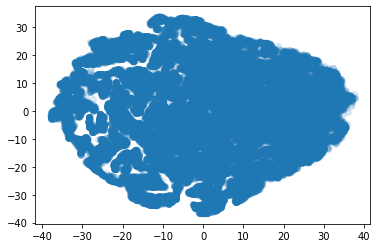

In [40]:
plt.scatter(X_x, X_y, alpha=0.15)